In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into python environment

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Make ‘PassengerId’ as the index column

In [4]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\titanic_dataset.csv',index_col='PassengerId')

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check the basic details of the dataset

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.shape

(891, 11)

Fill in all the missing values present in all the columns in the dataset

In [9]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

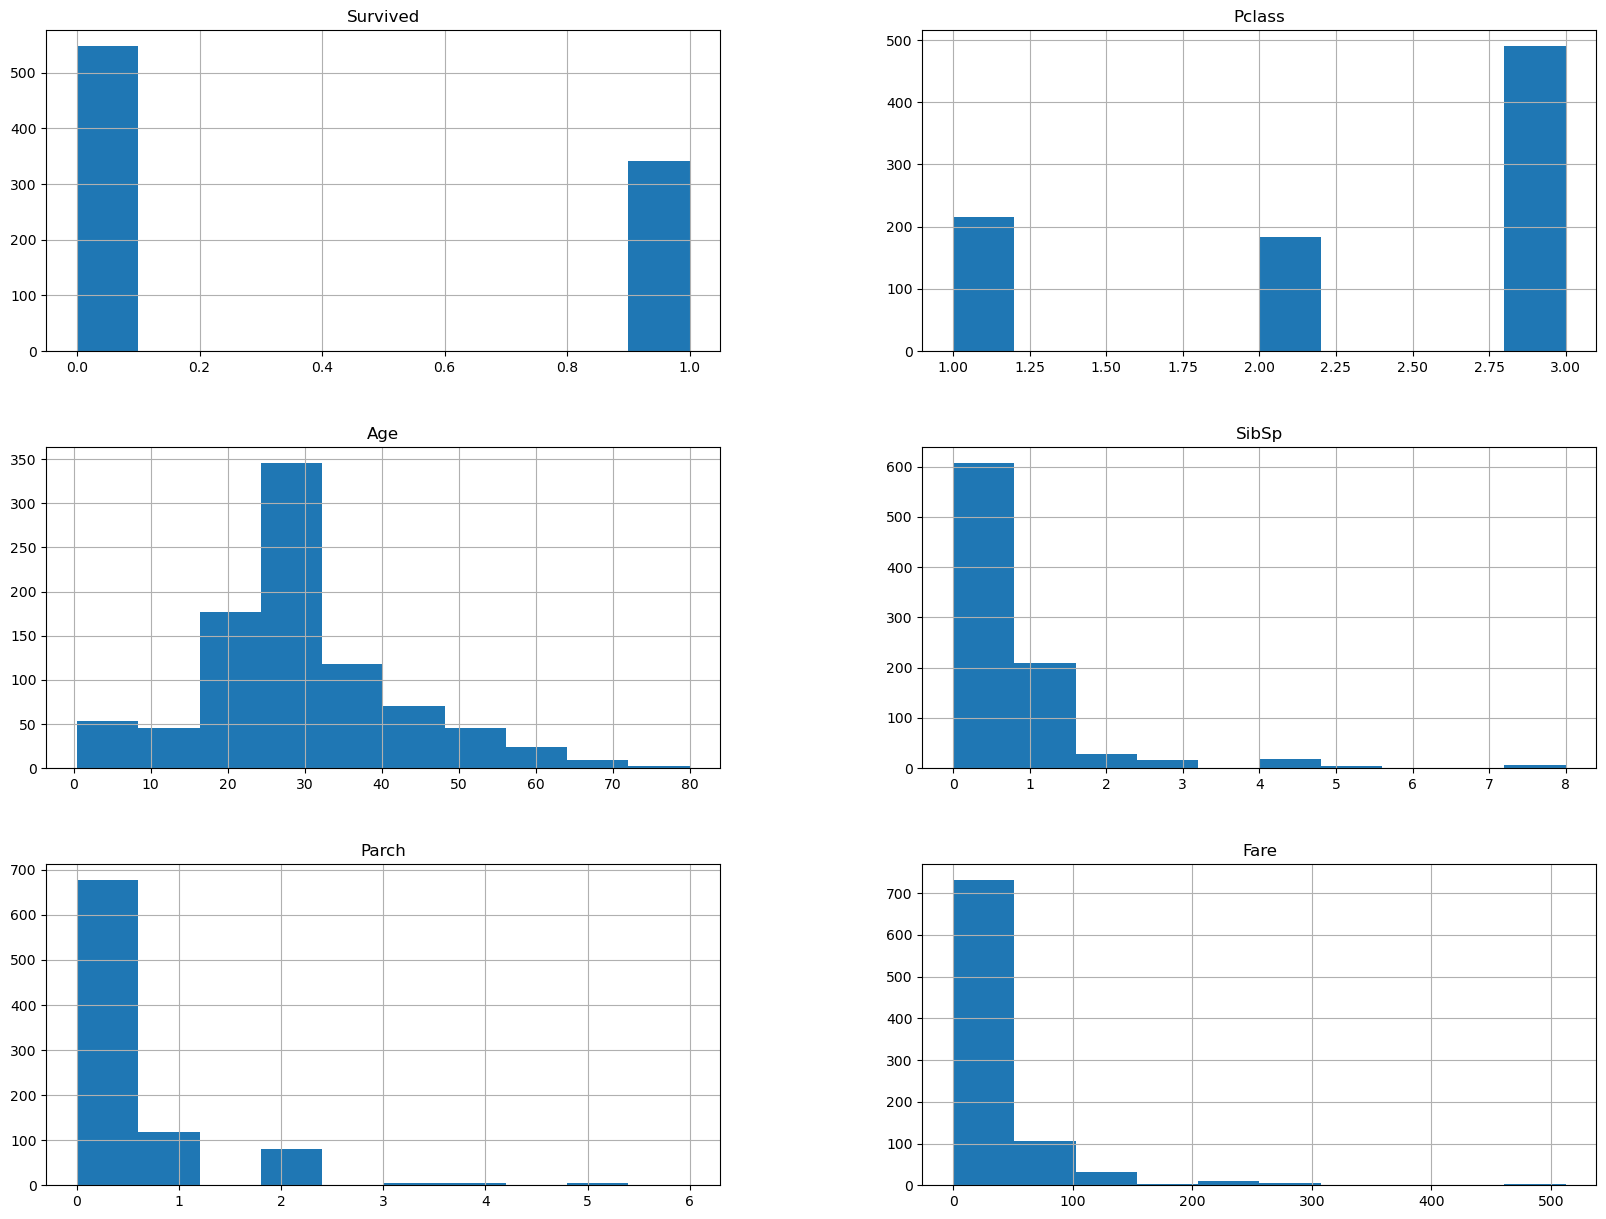

In [13]:
fregraph = df.select_dtypes(include=["float","int64"])
fregraph.hist(figsize=(20,15))
plt.show()

In [14]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [15]:
df["Age"].isna().sum()

0

In [16]:
for col in["Cabin","Embarked"]:
    df[col]=df[col].fillna(df[col].mode()[0])

In [18]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Check and handle outliers in at least 3 columns in the dataset

In [19]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
num_col=['Survived', 'Pclass','Age', 'SibSp', 'Parch','Fare']

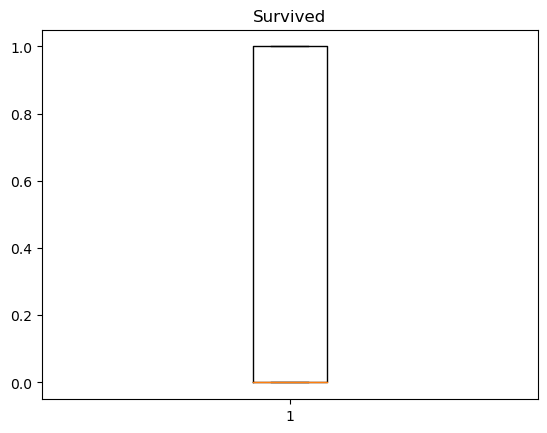

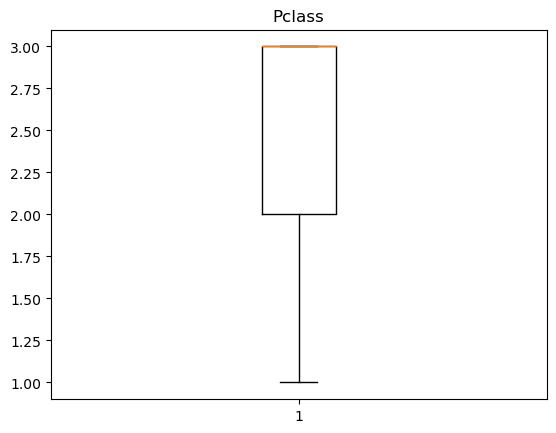

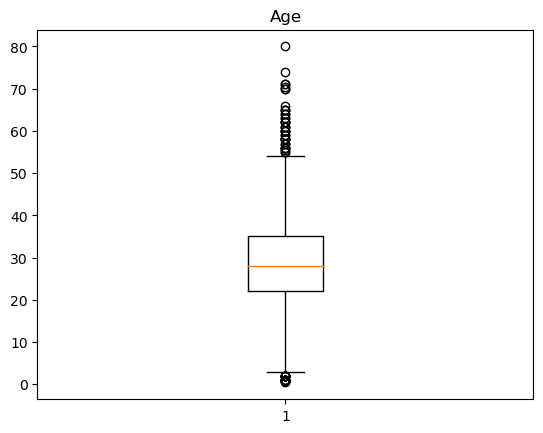

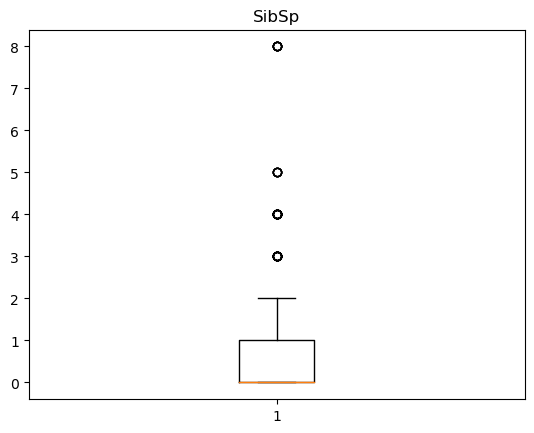

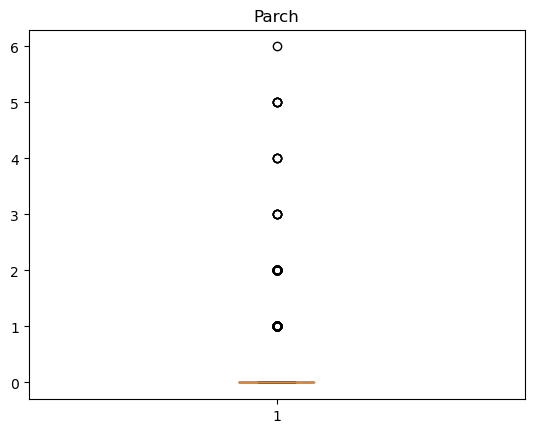

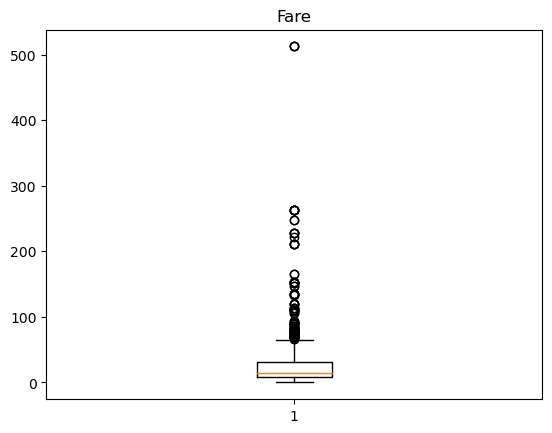

In [21]:
for i in num_col:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [22]:
Q1 = np.percentile(df['Age'],25,method="midpoint")
Q2 = np.percentile(df['Age'],50,method="midpoint")
Q3 = np.percentile(df['Age'],75,method="midpoint")

In [23]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [24]:
IQR= Q3-Q1

In [25]:
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [26]:
print(upp_lim)
print(low_lim)

54.5
2.5


In [27]:
df["Age"]=np.where(df["Age"]>upp_lim,upp_lim,np.where(df["Age"]<low_lim,low_lim,df["Age"]))

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1c57234f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1c5723a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1c5723250>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1c5723f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1c5748250>],
 'means': []}

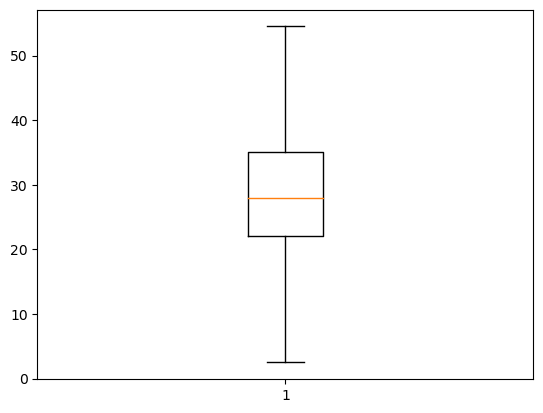

In [29]:
plt.boxplot(df["Age"])

In [31]:
Q11 = np.percentile(df['SibSp'],25,method="midpoint")
Q21 = np.percentile(df['SibSp'],50,method="midpoint")
Q31 = np.percentile(df['SibSp'],75,method="midpoint")

In [32]:
print(Q11)
print(Q21)
print(Q31)

0.0
0.0
1.0


In [33]:
IQR1=Q31-Q11

In [34]:
upp_lim1 = Q31+1.5*IQR1
low_lim1 = Q11-1.5*IQR1

In [35]:
print(upp_lim1)
print(low_lim1)

2.5
-1.5


In [36]:
outliers=[]
for x in df["SibSp"]:
    if(x>upp_lim1) or (x<low_lim1):
        outliers.append(x)

In [37]:
outliers

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [38]:
df["SibSp"]=np.where(df["SibSp"]>upp_lim1,upp_lim1,np.where(df["SibSp"]<low_lim1,low_lim1,df["SibSp"]))

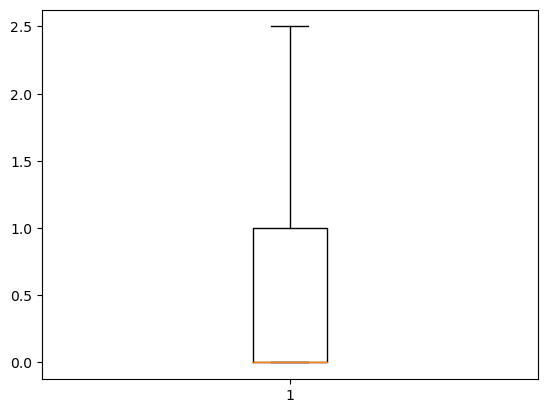

In [39]:
plt.boxplot(df["SibSp"])
plt.show()

In [40]:
Q12 = np.percentile(df['Fare'],25,method="midpoint")
Q22 = np.percentile(df['Fare'],50,method="midpoint")
Q32 = np.percentile(df['Fare'],75,method="midpoint")

In [41]:
print(Q12)
print(Q22)
print(Q32)

7.9104
14.4542
31.0


In [42]:
IQR2=Q32-Q12

In [43]:
print(Q12)
print(Q22)
print(Q32)

7.9104
14.4542
31.0


In [44]:
upp_lim2 = Q3+1.5*IQR2
low_lim2 = Q1-1.5*IQR2

In [45]:
print(upp_lim2)
print(low_lim2)

69.6344
-12.6344


In [46]:
outliers=[]
for x in df["Fare"]:
    if(x>upp_lim2) or (x<low_lim2):
        outliers.append(x)

In [47]:
outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 134.5,
 263.0,
 75.25,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 80.0,
 83.1583,
 89.1042,
 164.8667,
 83.1583]

In [48]:
df["Fare"]=np.where(df["Fare"]>upp_lim2,upp_lim2,np.where(df["Fare"]<low_lim2,low_lim2,df["Fare"]))

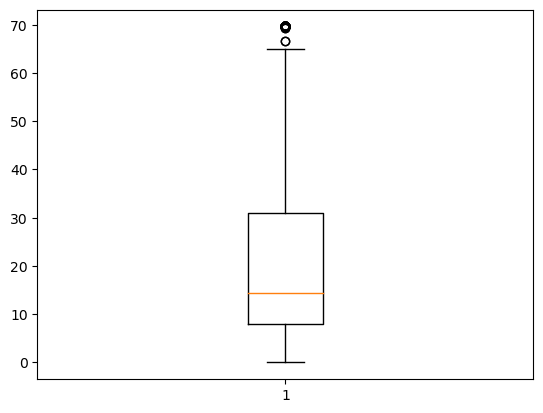

In [49]:
plt.boxplot(df["Fare"])
plt.show()                                #Since the presence of outliers are high, we adopted this method rather than dropping

Do min max scaling on the feature set (Take ‘Survived’ as target)

In [51]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,69.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,B96 B98,S


In [53]:
x=df.drop("Survived",axis=1)

In [54]:
y=df["Survived"]

In [55]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,B96 B98,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,69.6344,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,B96 B98,S


In [56]:
x1=x.drop(['Name', 'Sex', 'Age','Ticket','Cabin', 'Embarked'],axis=1)

In [57]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x1=min_max.fit_transform(x1)

In [58]:
type(x1)

numpy.ndarray

In [59]:
x1 = pd.DataFrame(x1,columns=['Pclass', 'SibSp', 'Parch','Fare'])

In [60]:
x1.describe()

,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.170595,0.063599,0.352690
std,0.418036,0.283298,0.134343,0.309324
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.113599
50%,1.000000,0.000000,0.000000,0.207573
75%,1.000000,0.400000,0.000000,0.445182
max,1.000000,1.000000,1.000000,1.000000
